<a href="https://colab.research.google.com/github/xiaohuiliugis/Integrating-Machine-Learning-into-Geographic-Research/blob/main/Python%20Refresh%20and%20GeoPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
my_list = ["Buffalo","DC","NYC"]

In [ ]:
my_list

['Buffalo', 'DC', 'NYC']

In [ ]:
my_list.append("Seattle")
my_list

['Buffalo', 'DC', 'NYC', 'Seattle']

In [ ]:
my_list.remove("NYC")
my_list

['Buffalo', 'DC', 'Seattle']

In [ ]:
person_a = {"name":"Yingjie", "city":"Buffalo"}

In [ ]:
person_a["name"]

'Yingjie'

In [ ]:
person_a["hobby"] ="hiking"

In [ ]:
person_a

{'city': 'Buffalo', 'hobby': 'hiking', 'name': 'Yingjie'}

In [ ]:
def print_my_msg(name, major):
  print("My name is "+name+", my major is "+major)

In [ ]:
print_my_msg("Yingjie","GIS")

My name is Yingjie, my major is GIS


In [ ]:
print_my_msg("John","GIS")

My name is John, my major is GIS


In [ ]:
person_a

{'city': 'Buffalo', 'hobby': 'hiking', 'name': 'Yingjie'}

In [ ]:
import pandas as pd

In [ ]:
data = [['Alex',32],['Bob',56],['Clarke',23]]

In [ ]:
df = pd.DataFrame(data,columns=['Name','Age'])

In [ ]:
df

,Name,Age
0,Alex,32
1,Bob,56
2,Clarke,23


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/2021AAGWorkshop/Demo/Data/file_demo.csv", header=None)

In [ ]:
df

,0,1
0,503,GIS and Machine Learning
1,281,Web-based GIS
2,506,Geographic Information Systems
3,511,Spatial Data Science


In [ ]:
df.columns = ["Num","Title"]
df

,Num,Title
0,503,GIS and Machine Learning
1,281,Web-based GIS
2,506,Geographic Information Systems
3,511,Spatial Data Science


In [ ]:
df.head(2)

,Num,Title
0,503,GIS and Machine Learning
1,281,Web-based GIS


In [ ]:
df["Title"]

0          GIS and Machine Learning
1                     Web-based GIS
2    Geographic Information Systems
3              Spatial Data Science
Name: Title, dtype: object

In [ ]:
df.iloc[0]

Num                           503
Title    GIS and Machine Learning
Name: 0, dtype: object

In [ ]:
df["Title"][1]

'Web-based GIS'

In [ ]:
df.shape

(4, 2)

In [ ]:
!pip install geopandas

     |████████████████████████████████| 972kB 4.3MB/s 
     |████████████████████████████████| 14.8MB 295kB/s 
     |████████████████████████████████| 6.5MB 51.2MB/s 


In [ ]:
import geopandas as gpd

In [ ]:
world_shp = gpd.read_file("/content/drive/MyDrive/2021AAGWorkshop/Demo/Data/Countries_2007.shp")

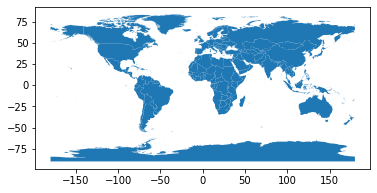

In [ ]:
world_shp.plot()

In [ ]:
world_shp.head()

,FIPS_CNTRY,GMI_CNTRY,ISO_2DIGIT,ISO_3DIGIT,ISO_NUM,CNTRY_NAME,LONG_NAME,ISOSHRTNAM,UNSHRTNAM,LOCSHRTNAM,LOCLNGNAM,STATUS,SQKM,SQMI,POP2007,POP2015,POP2025,POP014_07,POP1564_07,HIVAIDSTOT,HIVAIDS_YR,HIVDTH,HIVDTH_YR,Shape_Leng,Shape_Area,TOTCO2_200,GDP_USD,GDP_YR,IMPORT_USD,IMPORT_YR,EXPORT_USD,EXPORT_YR,geometry
0,FK,FLK,FK,FLK,238,Falkland Is.,Falkland Islands (Islas Malvinas),Falkland Islands (Malvinas),Falkland Islands (Malvinas),None,None,Non-Self-Governing Territory of the UK,10216.81,3944.71,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,19.082566,1.495383,0.034875,7.500000e+07,2002.0,90000000.0,2004.0,125000000.0,2004.0,"MULTIPOLYGON (((-59.34806 -52.34305, -59.37945..."
1,FG,GUF,GF,GUF,254,French Guiana,Department of Guiana,French Guiana,French Guiana,Guyane,None,Oversea Department of France,83726.18,32326.68,203321.0,229142.0,259123.0,58239.0,131960.0,-99.0,-99.0,-99.0,-99.0,12.253085,6.807577,1.087413,1.551000e+09,2003.0,625000000.0,2002.0,137500000.0,2003.0,"POLYGON ((-54.60378 2.32919, -54.49917 2.36500..."
2,GY,GUY,GY,GUY,328,Guyana,Co-operative Republic of Guyana,Guyana,Guyana,None,None,UN Member State,210335.67,81210.62,769095.0,775526.0,755884.0,200436.0,527908.0,11000.0,2003.0,1100.0,2003.0,25.707599,17.175215,1.715807,3.620000e+09,2006.0,706900000.0,2006.0,621600000.0,2006.0,"POLYGON ((-58.17262 6.81222, -58.15494 6.82819..."
3,PC,PCN,PN,PCN,612,Pitcairn Is.,"Pitcairn, Henderson, Ducie, and Oeno Isl",Pitcairn,Pitcairn Island,None,None,Non-Self-Governing Territory of the UK,27.70,10.69,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0.338167,0.004286,-99.000000,-9.900000e+01,-99.0,-99.0,-99.0,-99.0,-99.0,"MULTIPOLYGON (((-128.33222 -24.32726, -128.326..."
4,SX,SGS,GS,SGS,239,South Georgia & the South Sandwich Is.,South Georgia and the South Sandwich Is,South Georgia and the South Sandwich Islands,South Georgia and the South Sandwich Islands,None,None,UK Territory,3415.89,1318.88,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,7.337913,0.515458,-99.000000,-9.900000e+01,-99.0,-99.0,-99.0,-99.0,-99.0,"MULTIPOLYGON (((-36.99139 -54.35056, -36.99973..."


In [ ]:
type(world_shp)

geopandas.geodataframe.GeoDataFrame

In [ ]:
type(world_shp["geometry"])

geopandas.geoseries.GeoSeries

In [ ]:
type(world_shp["GDP_USD"])

pandas.core.series.Series

In [ ]:
major_countries = world_shp[world_shp["POP2015"]>100000000]

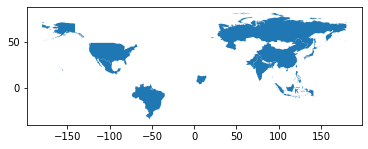

In [ ]:
major_countries.plot()

In [ ]:
world_shp.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [ ]:
ne_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ne_cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))


In [ ]:
import matplotlib.pyplot as plt


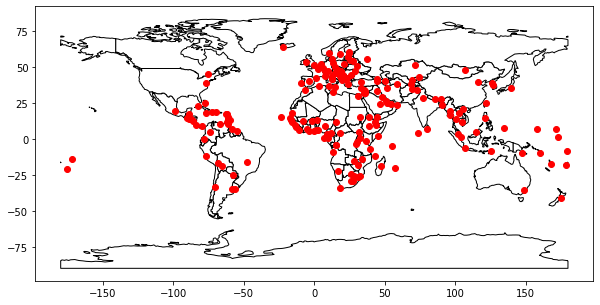

In [ ]:
fig, axis = plt.subplots(figsize=(10,6))
ne_world.plot(ax=axis, color="white", edgecolor="black")
ne_cities.plot(ax=axis, color="red")

In [ ]:
nyc = gpd.read_file(gpd.datasets.get_path('nybb'))

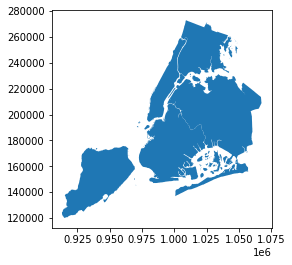

In [ ]:
nyc.plot()

In [ ]:
nyc.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
nyc_buffer = nyc["geometry"].buffer(5000)

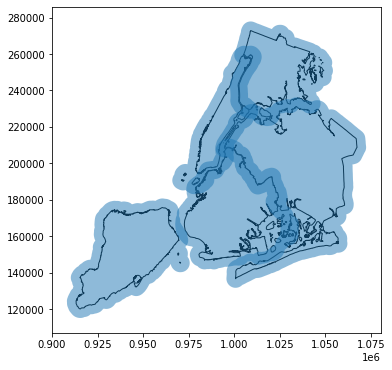

In [ ]:
fig, axis = plt.subplots(figsize=(10,6))
nyc.plot(ax=axis, color="white", edgecolor="black")
nyc_buffer.plot(ax=axis, alpha=0.5)